# Features 2
Acá probamos diferentes modelos para las features 2.
|hora|dia_semana|mes|es_feriado|total_bicis_salieron_global|pct_mujeres_salieron_global|pct_hombres_salieron_global|q1_edad_salieron_global|media_edad_salieron_global|q3_edad_salieron_global|pct_iconic_salieron_global|pct_fit_salieron_global|bicis_salieron_estacion_2| ... | bicis_salieron_estacion_x|llegadas_estacion_2_h1| ...|llegadas_estacion_x_h24|target_estacion_2| ... |target_estacion_x|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import importlib

In [2]:
import models_f2 as md2
import data_processing_f2 as dp
import metrics as mt
import visualizacion_f2 as vis2
import auxiliares_f2 as aux2
import cross_validation_f2 as cv

In [3]:
BASE_DIR = os.getcwd()
train_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'train_dataset_features2.csv')
val_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'val_dataset_features2.csv')
test_f2_path = os.path.join(BASE_DIR, '..', '..','data', 'processed', 'features2', 'test_dataset_features2.csv')

In [4]:
train_f2 = pd.read_csv(train_f2_path)
val_f2 = pd.read_csv(val_f2_path)
test_f2 = pd.read_csv(test_f2_path)

# Modelos básicos
Corremos modelos básicos con hiperparámetros arbitrarios para ver como es la situación actual. Mostramos para cada modelo las métricas.

### 1. Predicción 202 solo con 202
Creamos un dataset que solo usa la estación de la facultad de derecho porque es la que más viajes tiene.

In [13]:
# 202
importlib.reload(dp)
df_filtrado_train_202 = dp.filtrar_dataset_por_estaciones(train_f2, [202], verbose=False)
X_train_202, y_train_202, feature_names_train_202 = dp.dividir_dataset_estacion(df_filtrado_train_202, 202)

df_filtrado_val_202 = dp.filtrar_dataset_por_estaciones(val_f2, [202], verbose=False)
X_val_202, y_val_202, feature_names_val_202 = dp.dividir_dataset_estacion(df_filtrado_val_202, 202, verbose=False)

df_filtrado_test_202 = dp.filtrar_dataset_por_estaciones(test_f2, [202], verbose=False)
X_test_202, y_test_202, feature_names_test_202 = dp.dividir_dataset_estacion(df_filtrado_test_202, 202, verbose=False)

✓ Columna 'hora' convertida a hora (0-23)
=== DIVISIÓN DATASET ESTACIÓN 202 ===
Shape original: (12108, 400)
Features (X): (12108, 38)
Target (y): (12108,)
Target columna: target_estacion_202
Rango de y: 0.00 - 38.00
Media de y: 2.81
Features incluidos: 38

📊 ESTADÍSTICAS DEL TARGET:
  - Valores nulos: 0
  - Valores cero: 4521
  - Percentiles: 25%=0.00, 50%=1.00, 75%=4.00
Dataset dividido estación 202: X(12108, 38), y(12108,)


In [14]:
importlib.reload(aux2)
features = aux2.get_features(X_train_202)
print("Features for station 202:", features)
print("Features for station 202:", feature_names_train_202)

Features for station 202: [0.0, 0.0, 12.0, 2022.0, 0.0, 1.0, 1.0, 0.0, 23.0, 23.0, 23.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Features for station 202: ['hora', 'dia_semana', 'mes', 'año', 'es_feriado', 'total_bicis_salieron_global', 'pct_mujeres_salieron_global', 'pct_hombres_salieron_global', 'q1_edad_salieron_global', 'media_edad_salieron_global', 'q3_edad_salieron_global', 'pct_iconic_salieron_global', 'pct_fit_salieron_global', 'bicis_salieron_estacion_202', 'llegadas_estacion_202_h1', 'llegadas_estacion_202_h2', 'llegadas_estacion_202_h3', 'llegadas_estacion_202_h4', 'llegadas_estacion_202_h5', 'llegadas_estacion_202_h6', 'llegadas_estacion_202_h8', 'llegadas_estacion_202_h10', 'llegadas_estacion_202_h12', 'llegadas_estacion_202_h16', 'llegadas_estacion_202_h20', 'llegadas_estacion_202_h24', 'llegadas_total_h1', 'llegadas_total_h10', 'llegadas_total_h12', 'llegadas_total_h16', 'llega

In [15]:
importlib.reload(md2)
pred_202 = md2.linear_regression(X_train_202, y_train_202, X_val_202)


MÉTRICAS DE REGRESIÓN - Linear Regression
                           Métrica      Linear Regression
               Mean Absolute Error                 1.1359
                Mean Squared Error                 3.6497
           Root Mean Squared Error                 1.9104
                         R-squared                 0.6572
Mean Absolute Percentage Error (%) 127717466355686368.00%
                Explained Variance                 0.6617
                     Maximum Error                13.0000
                       Correlation                 0.8152
                              Bias                 0.2190
                Relative Error (%)         2835897464.28%
 --- Estadísticas Descriptivas ---                       
              Media Valores Reales                 1.9882
                Media Predicciones                 2.2072
         Desv. Est. Valores Reales                 3.2627
           Desv. Est. Predicciones                 2.8373
                Número de Mue

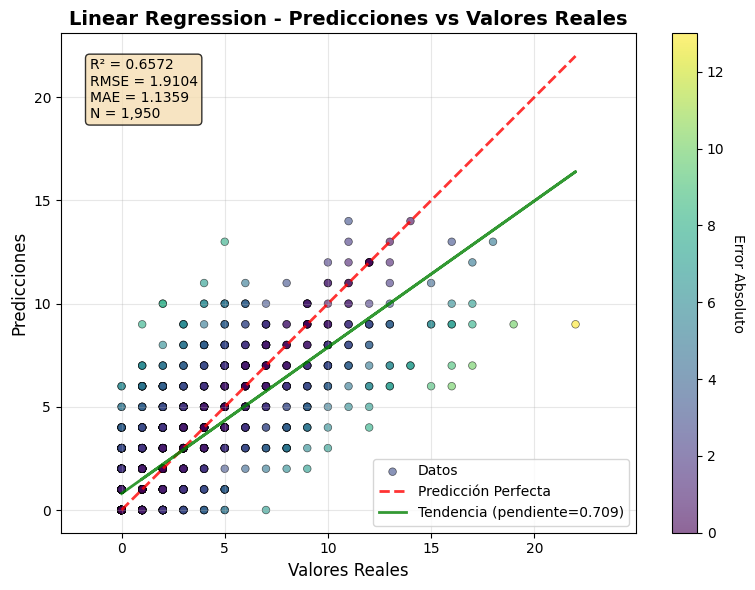

In [16]:
importlib.reload(mt)
metricas, tabla = mt.evaluar_modelo_regresion(y_val_202, pred_202, "Linear Regression")

In [17]:
importlib.reload(md2)
print("Training Random Forest Regressor...")
pred_202_rf = md2.random_forest_regressor(X_train_202, y_train_202, X_val_202)
print("Training Gradient Boosting Regressor...")
pred_202_gb = md2.gradient_boosting_regressor(X_train_202, y_train_202, X_val_202)
print("Training Decision Tree Regressor...")
pred_202_dt = md2.decision_tree_regressor(X_train_202, y_train_202, X_val_202)
print("Training KNN Regressor...")
pred_202_knn = md2.knn_regressor(X_train_202, y_train_202, X_val_202)
# print("Training SVR Regressor...")
# pred_202_svr = md2.svr_regressor(X_train_202, y_train_202, X_val_202)
print("Training Ridge Regression...")
pred_202_lr_ridge = md2.ridge_regression(X_train_202, y_train_202, X_val_202)
print("Training Lasso Regression...")
pred_202_lr_lasso = md2.lasso_regression(X_train_202, y_train_202, X_val_202)


Training Random Forest Regressor...
Training Gradient Boosting Regressor...
Training Decision Tree Regressor...
Training KNN Regressor...
Training Ridge Regression...
Training Lasso Regression...


In [18]:
# comparación de modelos
importlib.reload(mt)
modelos_predicciones = {'Linear Regression' : pred_202,
        'Random Forest Regressor' : pred_202_rf,
        'Gradient Boosting Regressor' : pred_202_gb,
        'Decision Tree Regressor' : pred_202_dt,
        'KNN Regressor' : pred_202_knn,
        # 'SVR Regressor' : pred_202_svr,
        'Ridge Regression' : pred_202_lr_ridge,
        'Lasso Regression' : pred_202_lr_lasso}

mt.tabla_metricas_modelos(modelos_predicciones, y_val_202)


🏆 MEJOR MODELO: Random Forest Regressor
   R² = 0.6998 | RMSE = 1.7876 | MAE = 0.9338


,Rank,Modelo,MAE,RMSE,R²,MAPE (%),Correlación,N_Muestras
0,1,Random Forest Regressor,0.9338,1.7876,0.6998,5.704560e+16,0.8452,1950
1,2,Gradient Boosting Regressor,0.9595,1.8146,0.6907,6.559089e+16,0.8371,1950
2,3,Linear Regression,1.1359,1.9104,0.6572,1.277175e+17,0.8152,1950
3,4,Ridge Regression,1.1503,1.9169,0.6548,1.332604e+17,0.8141,1950
4,5,Lasso Regression,1.3703,1.9933,0.6268,2.228704e+17,0.8033,1950
5,6,KNN Regressor,1.0723,2.0470,0.6064,6.074086e+16,0.8072,1950
6,7,Decision Tree Regressor,1.6354,2.6034,0.3633,1.993132e+17,0.7065,1950


### 2. Predicción 202 con populares
Predecimos: 202 (Facultad de Derecho)
Estaciones en features:
- 202 (Facultad de Derecho)
- 5 (Plaza Italia)
- 175 (Constitución)
- 14 (Pacifico)
- 130 (Retiro II)


In [19]:
# 202 con más estaciones populares
importlib.reload(dp)
df_filtrado_train_202_populares = dp.filtrar_dataset_por_estaciones(train_f2, [202, 5, 175, 14, 130], verbose=False)
X_train_202_populares, y_train_202_populares, feature_names_train_202_populares = dp.dividir_dataset_estacion(df_filtrado_train_202_populares, 202)

df_filtrado_val_202_populares = dp.filtrar_dataset_por_estaciones(val_f2, [202, 5, 175, 14, 130], verbose=False)
X_val_202_populares, y_val_202_populares, feature_names_val_202_populares = dp.dividir_dataset_estacion(df_filtrado_val_202_populares, 202, verbose=False)

✓ Columna 'hora' convertida a hora (0-23)
=== DIVISIÓN DATASET ESTACIÓN 202 ===
Shape original: (12108, 452)
Features (X): (12108, 90)
Target (y): (12108,)
Target columna: target_estacion_202
Rango de y: 0.00 - 38.00
Media de y: 2.81
Features incluidos: 90

📊 ESTADÍSTICAS DEL TARGET:
  - Valores nulos: 0
  - Valores cero: 4521
  - Percentiles: 25%=0.00, 50%=1.00, 75%=4.00
Dataset dividido estación 202: X(12108, 90), y(12108,)


In [20]:
importlib.reload(md2)
pred_202_populares = md2.linear_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)


MÉTRICAS DE REGRESIÓN - Linear Regression
                           Métrica      Linear Regression
               Mean Absolute Error                 1.1446
                Mean Squared Error                 3.6236
           Root Mean Squared Error                 1.9036
                         R-squared                 0.6596
Mean Absolute Percentage Error (%) 139727065362007696.00%
                Explained Variance                 0.6660
                     Maximum Error                12.0000
                       Correlation                 0.8186
                              Bias                 0.2605
                Relative Error (%)         3102564129.61%
 --- Estadísticas Descriptivas ---                       
              Media Valores Reales                 1.9882
                Media Predicciones                 2.2487
         Desv. Est. Valores Reales                 3.2627
           Desv. Est. Predicciones                 2.8782
                Número de Mue

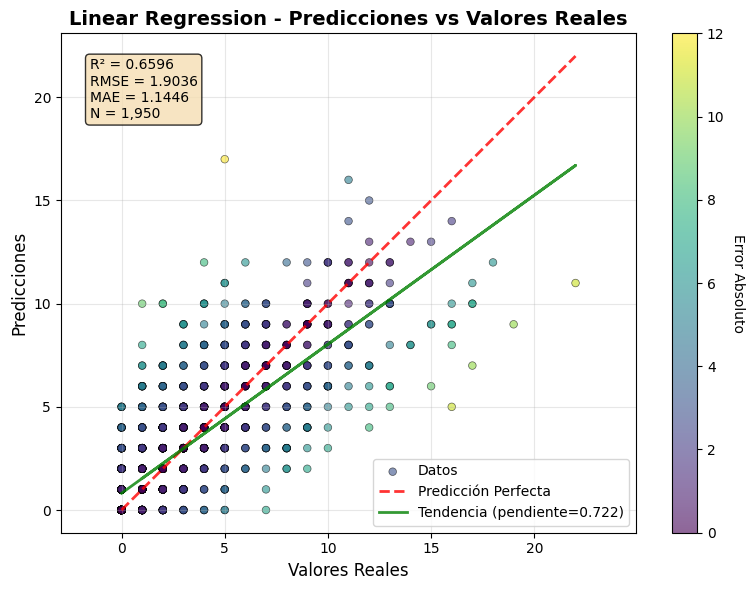

In [21]:
importlib.reload(mt)
metricas, tabla = mt.evaluar_modelo_regresion(y_val_202, pred_202_populares, "Linear Regression")

In [22]:
importlib.reload(md2)
print("Training Random Forest Regressor on popular stations...")
pred_202_pop_rf = md2.random_forest_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Gradient Boosting Regressor on popular stations...")
pred_202_pop_gb = md2.gradient_boosting_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Decision Tree Regressor on popular stations...")
pred_202_pop_dt = md2.decision_tree_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training KNN Regressor on popular stations...")
pred_202_pop_knn = md2.knn_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
# print("Training SVR Regressor on popular stations...")
# pred_202_pop_svr = md2.svr_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Ridge Regression on popular stations...")
pred_202_pop_lr_ridge = md2.ridge_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Lasso Regression on popular stations...")
pred_202_pop_lr_lasso = md2.lasso_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)

Training Random Forest Regressor on popular stations...
Training Gradient Boosting Regressor on popular stations...
Training Decision Tree Regressor on popular stations...
Training KNN Regressor on popular stations...
Training Ridge Regression on popular stations...
Training Lasso Regression on popular stations...


In [23]:
# Comparación modelos
importlib.reload(mt)
modelos_predicciones_populares = {
    'Linear Regression': pred_202_populares,
    'Random Forest Regressor': pred_202_pop_rf,
    'Gradient Boosting Regressor': pred_202_pop_gb,
    'Decision Tree Regressor': pred_202_pop_dt,
    'KNN Regressor': pred_202_pop_knn,
    # 'SVR Regressor': pred_202_pop_svr,
    'Ridge Regression': pred_202_pop_lr_ridge,
    'Lasso Regression': pred_202_pop_lr_lasso
}
mt.tabla_metricas_modelos(modelos_predicciones_populares, y_val_202_populares)


🏆 MEJOR MODELO: Random Forest Regressor
   R² = 0.6931 | RMSE = 1.8075 | MAE = 0.9482


,Rank,Modelo,MAE,RMSE,R²,MAPE (%),Correlación,N_Muestras
0,1,Random Forest Regressor,0.9482,1.8075,0.6931,5.727655e+16,0.8406,1950
1,2,Gradient Boosting Regressor,0.9569,1.8328,0.6845,6.305039e+16,0.8337,1950
2,3,Linear Regression,1.1446,1.9036,0.6596,1.397271e+17,0.8186,1950
3,4,Ridge Regression,1.1472,1.9056,0.6589,1.411128e+17,0.8183,1950
4,5,Lasso Regression,1.3656,1.9904,0.6279,2.217157e+17,0.8038,1950
5,6,KNN Regressor,1.0887,2.0682,0.5982,6.189563e+16,0.8041,1950
6,7,Decision Tree Regressor,1.4323,2.7797,0.2742,7.182664e+16,0.6838,1950


## 3. Predecir todas las estacione
- solo con si mismas (para cada una)
- cada una entrenada por separado

In [24]:
importlib.reload(dp)
targets =  dp.obtener_targets_disponibles(train_f2)

In [25]:
lin_reg_all = []
lin_reg_true = []
importlib.reload(md2)
importlib.reload(dp)

for i in range(len(targets)):
    if i % 10 == 0:
        print(f"Training Linear Regression for station {targets[i]}...")
    df_filtrado_train = dp.filtrar_dataset_por_estaciones(train_f2, [targets[i]], verbose=False)
    X_train, y_train, feature_names_train = dp.dividir_dataset_estacion(df_filtrado_train, targets[i], verbose=False)
    
    df_filtrado_val = dp.filtrar_dataset_por_estaciones(val_f2, [targets[i]], verbose=False)
    X_val, y_val, feature_names_val = dp.dividir_dataset_estacion(df_filtrado_val, targets[i], verbose=False)
    lin_reg_true.append(y_val)
    
    pred = md2.linear_regression(X_train, y_train, X_val)
    lin_reg_all.append(pred)

Training Linear Regression for station 2...
Training Linear Regression for station 14...
Training Linear Regression for station 30...
Training Linear Regression for station 45...
Training Linear Regression for station 59...
Training Linear Regression for station 71...
Training Linear Regression for station 85...
Training Linear Regression for station 98...
Training Linear Regression for station 117...
Training Linear Regression for station 132...
Training Linear Regression for station 151...
Training Linear Regression for station 165...
Training Linear Regression for station 177...
Training Linear Regression for station 190...
Training Linear Regression for station 204...
Training Linear Regression for station 219...
Training Linear Regression for station 234...
Training Linear Regression for station 251...
Training Linear Regression for station 262...
Training Linear Regression for station 275...
Training Linear Regression for station 302...
Training Linear Regression for station 323.

In [26]:
importlib.reload(mt)
mt.estadisticas_metricas_por_estacion(lin_reg_true, lin_reg_all, targets)


📊 Calculando métricas para 362 estaciones...
📈 Total de muestras: 362

📈 RESUMEN OPTIMIZADO:
   • Estaciones analizadas: 362
   • Muestras procesadas: 362
   • Promedio muestras/estación: 1.0
   • Métricas calculadas: 5

🏆 R² - MEJOR: Est.175 (0.7548) | PEOR: Est.471 (-0.2706)

✅ RMSE - MEJOR: Est.31 (0) | PEOR: Est.175 (2.912)

✅ MAE - MEJOR: Est.31 (0) | PEOR: Est.175 (1.833)

✅ MAPE - MEJOR: Est.504 (36.85) | PEOR: Est.443 (99.7)


,Métrica,Mínimo,Estación_Min,Máximo,Estación_Max,Promedio,Mediana,Desv_Est,P25,P75,Rango,CV_%,N_Estaciones
0,MAE,0.0000,31,1.8330,175,0.4885,0.4405,0.2545,0.3073,0.6095,1.833,52.10,362
1,RMSE,0.0000,31,2.9120,175,0.9790,0.9466,0.3924,0.6897,1.1710,2.912,40.08,362
2,R²,-0.2706,471,0.7548,175,0.3361,0.3506,0.2020,0.1954,0.5066,1.025,60.10,362
3,MAPE,36.8500,504,99.7000,443,53.9700,52.4400,8.9230,48.4100,58.3900,62.850,16.53,354


Obtenemos una mejor visualización de como la cantidad de llegadas afectan las métricas.

In [27]:
importlib.reload(mt)
importlib.reload(aux2)
mse_vals, r2_vals, mae_vals, rmse_vals, mape_vals = mt.calcular_metricas_multiples(
    lin_reg_true,
    lin_reg_all )

arribos_dict = aux2.obtener_arribos_por_estacion(train_f2)

📊 Graficando métricas para 362 estaciones ordenadas por arribos...

📈 ANÁLISIS DE CORRELACIÓN ARRIBOS vs MÉTRICAS:
   • Correlación Arribos-MAE: 0.8446
   • Correlación Arribos-R²: 0.8005
   • Correlación Arribos-RMSE: 0.8083
   • Correlación Arribos-MAPE: nan

🎯 ESTACIONES EXTREMAS:
   • Menos arribos: Est.503.0 (120.0 arribos)
   • Más arribos: Est.14.0 (44,109.0 arribos)


c:\Users\felic\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


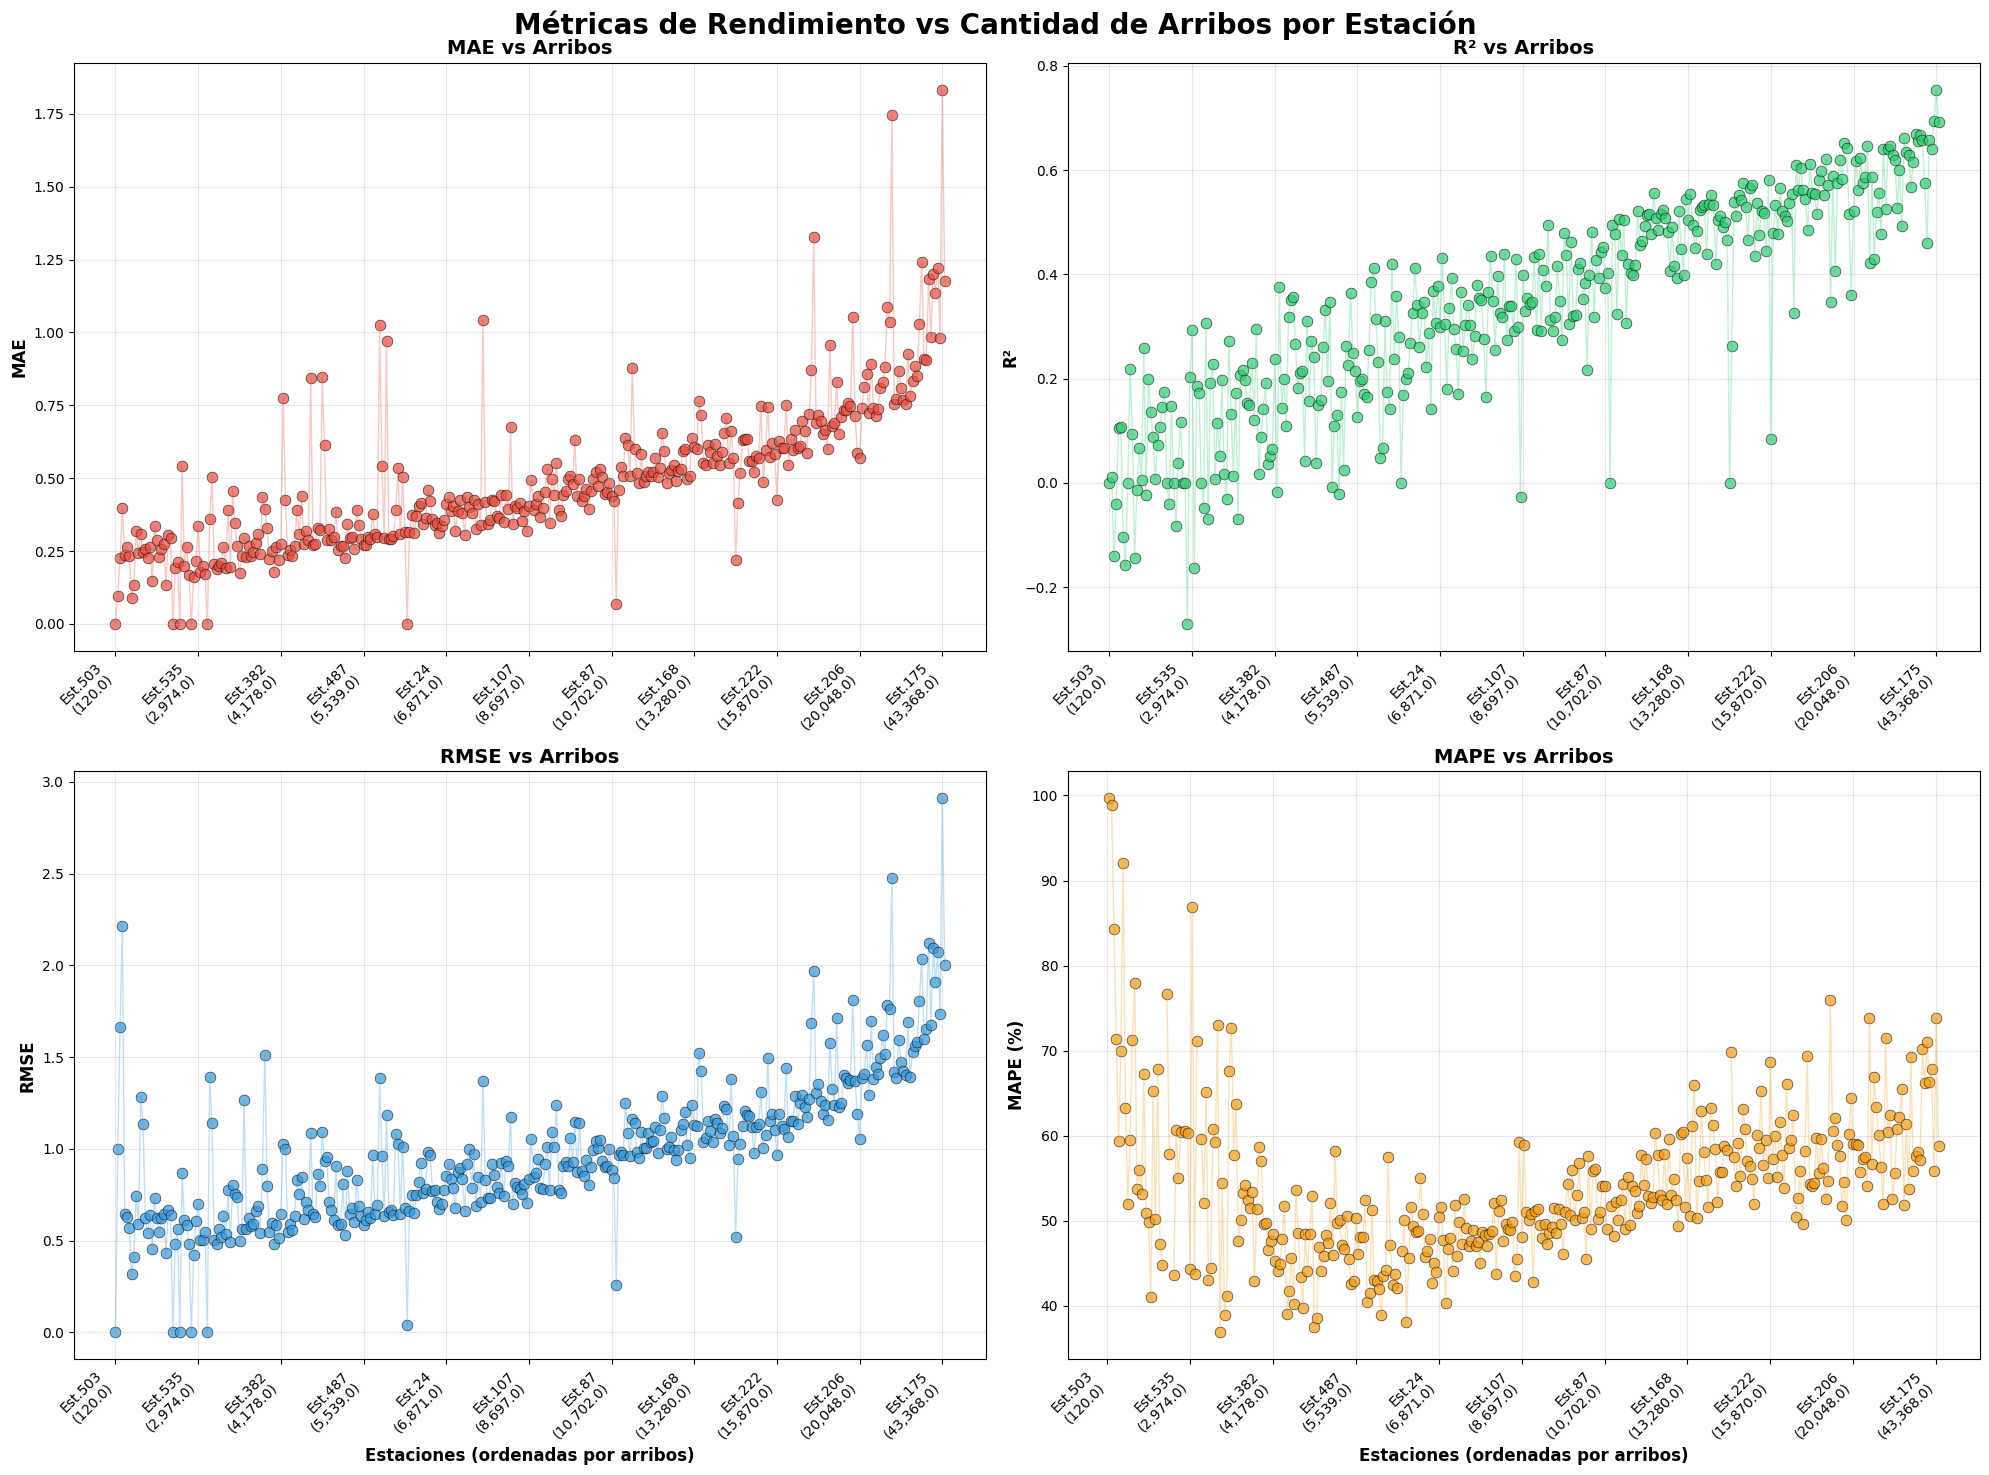

In [28]:
importlib.reload(aux2)
df_analisis = aux2.graficar_metricas_vs_arribos(
    arribos_dict, 
    mae_vals, 
    r2_vals, 
    rmse_vals, 
    mape_vals, 
    targets  # IDs de estaciones
)

INTERPRETACIÓN: 
El MAE sube cuando sube la cantidad de muestras porque el modelo predice peor, en R2 tambien sube porque predice peor pero no peor que la media. En general al modelo le va peor por lo que se viene viendo en los gráfico de y_true vs y_pred y cuando hay muchas muestras probablemente hayan algunas con y_trues mas altos.


### 4. Multipredicción
- probamos predecir algunas estaciones con los modelos multioutput
- agarramos estaciones populares y poco populares

In [59]:
importlib.reload(dp)
df_filtrado_train_multi = dp.filtrar_dataset_por_estaciones(train_f2, [202, 5, 175, 14, 130, 471, 503, 382, 24, 87, 222], verbose=True)
print(" x shape: ", df_filtrado_train_multi.shape)
X_train_multi, y_train_multi, feature_names_train_multi, target_names_train = dp.dividir_dataset_multiples_estaciones(df_filtrado_train_multi, [202, 5, 175, 14, 130, 471, 503, 382, 24, 87, 222])

df_filtrado_val_multi = dp.filtrar_dataset_por_estaciones(val_f2, [202, 5, 175, 14, 130, 471, 503, 382, 24, 87, 222], verbose=False)
X_val_multi, y_val_multi, feature_names_val_multi, target_names_val = dp.dividir_dataset_multiples_estaciones(df_filtrado_val_multi, [202, 5, 175, 14, 130, 471, 503, 382, 24, 87, 222])

=== FILTRADO POR ESTACIONES ===
Estaciones a incluir: [202, 5, 175, 14, 130, 471, 503, 382, 24, 87, 222]
Shape original: (12108, 5082)
Bicis salieron - Incluir: 11 columnas
Bicis salieron - Excluir: 351 columnas
Llegadas lag - Incluir: 132 columnas
Llegadas lag - Excluir: 4212 columnas
✓ Agregada columna 'llegadas_total_h1' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h10' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h12' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h16' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h2' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h20' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h24' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h3' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h4' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h5' (suma de 351 estaciones)
✓ Agregada columna 'llegadas_total_h6' (suma de 351 estaciones)
✓ Ag

In [30]:
importlib.reload(md2)
print("Training Linear Regression for multioutput...")
pred_multi = md2.linear_regression(X_train_multi, y_train_multi, X_val_multi)
print("Training Random Forest Regressor for multioutput...")
pred_multi_rf = md2.random_forest_regressor(X_train_multi, y_train_multi, X_val_multi)
print("Training Gradient Boosting Regressor (multioutput)...")
pred_multi_gb = md2.gradient_boosting_regressor_multioutput(X_train_multi, y_train_multi, X_val_multi)
print("Training Decision Tree Regressor for multioutput...")
pred_multi_dt = md2.decision_tree_regressor(X_train_multi, y_train_multi, X_val_multi)
print("Training KNN Regressor for multioutput...")
pred_multi_knn = md2.knn_regressor(X_train_multi, y_train_multi, X_val_multi)
# print("Training SVR Regressor (multioutput)...")
# pred_multi_svr = md2.svr_regressor_multioutput(X_train_multi, y_train_multi, X_val_multi)
print("Training Ridge Regression for multioutput...")
pred_multi_lr_ridge = md2.ridge_regression(X_train_multi, y_train_multi, X_val_multi)
print("Training Lasso Regression for multioutput...")
pred_multi_lr_lasso = md2.lasso_regression(X_train_multi, y_train_multi, X_val_multi)

Training Linear Regression for multioutput...
Training Random Forest Regressor for multioutput...
Training Gradient Boosting Regressor (multioutput)...
Training Decision Tree Regressor for multioutput...
Training KNN Regressor for multioutput...
Training Ridge Regression for multioutput...
Training Lasso Regression for multioutput...


c:\Users\felic\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\felic\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\felic\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\felic\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



📊 COMPARATIVA DE MÉTRICAS MULTIOUTPUT ENTRE MODELOS
 Rank                      Modelo  MAE_promedio  RMSE_promedio  R²_promedio  MAPE_promedio  Correlación_promedio  Bias_promedio  MAE_std  RMSE_std  R²_std
    1     Random Forest Regressor        0.6512          1.275       0.3952          54.54                0.6693         0.0188   0.4281    0.7712   0.336
    2 Gradient Boosting Regressor        0.7146          1.302       0.3827          54.56                0.6659       -0.04429   0.5429     0.814  0.3463
    3           Linear Regression        0.7502          1.336        0.363          60.58                0.6541       -0.06686    0.548    0.8366  0.3502
    4            Ridge Regression        0.7499          1.336       0.3629          60.59                 0.654       -0.06611   0.5472    0.8362  0.3503
    5            Lasso Regression        0.8175          1.389       0.3565          61.45                0.6618        -0.1133   0.5879     0.902  0.3176
    6            

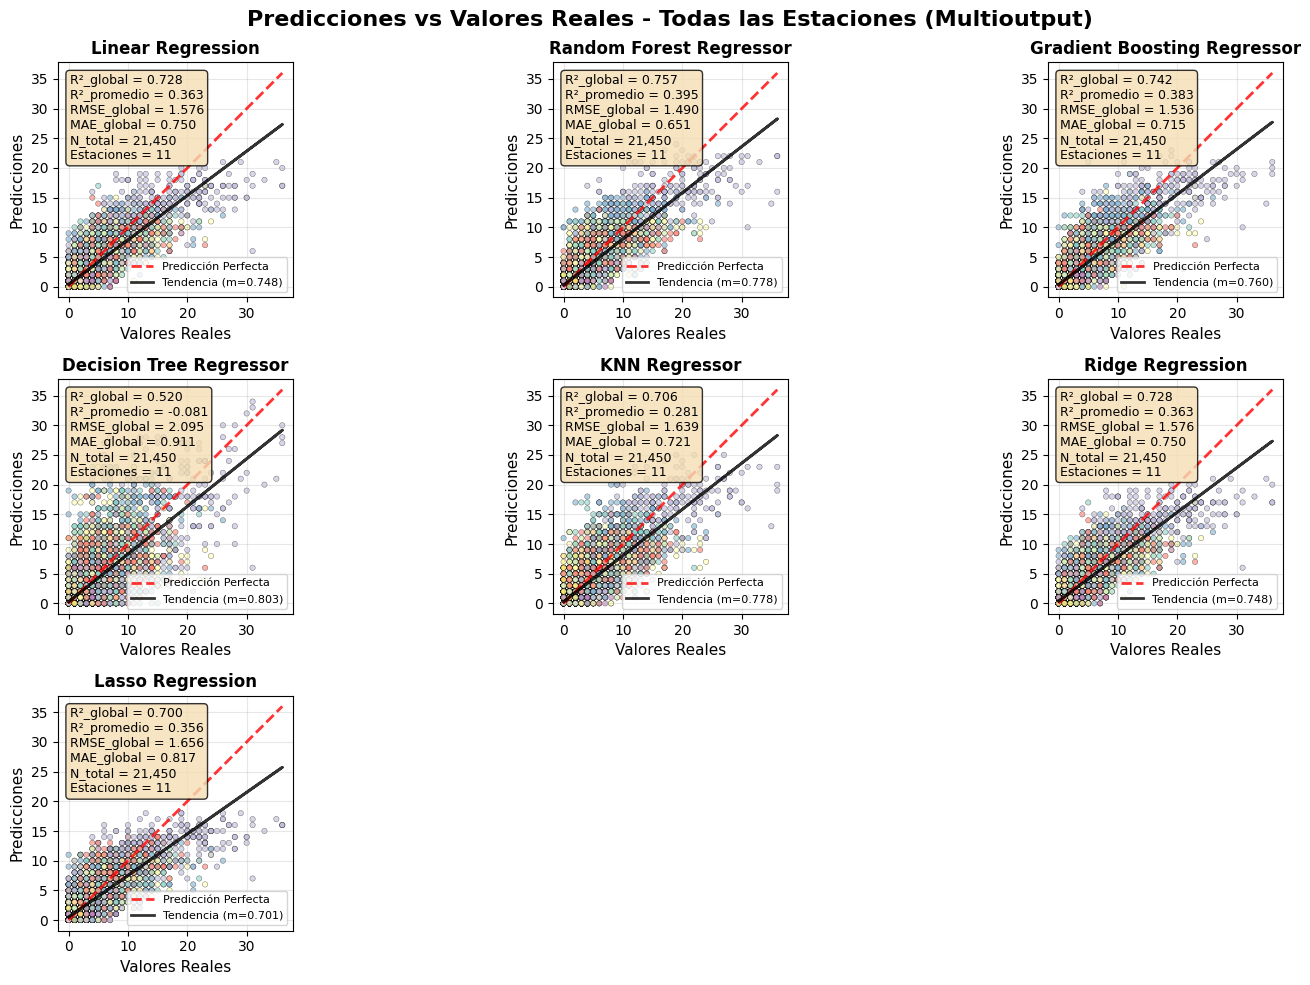


📊 Resumen de gráficos consolidados:
   • 7 modelos graficados
   • 11 estaciones/targets por modelo
   • Todas las predicciones en un gráfico por modelo

🏆 Ranking general de modelos (por R²_global):
   1. Random Forest Regressor: R²_global = 0.7568, R²_promedio = 0.3952
   2. Gradient Boosting Regressor: R²_global = 0.7418, R²_promedio = 0.3827
   3. Ridge Regression: R²_global = 0.7281, R²_promedio = 0.3629
   4. Linear Regression: R²_global = 0.7280, R²_promedio = 0.3630
   5. KNN Regressor: R²_global = 0.7060, R²_promedio = 0.2810
   6. Lasso Regression: R²_global = 0.6995, R²_promedio = 0.3565
   7. Decision Tree Regressor: R²_global = 0.5196, R²_promedio = -0.0814

📈 Mejores modelos por estación/target:
   • target_estacion_202: Random Forest Regressor (R² = 0.6907)
   • target_estacion_5: Gradient Boosting Regressor (R² = 0.6713)
   • target_estacion_175: Random Forest Regressor (R² = 0.8221)
   • target_estacion_14: Gradient Boosting Regressor (R² = 0.6955)
   • target_estacio

In [42]:
importlib.reload(mt)
predicciones_multi = {
    'Linear Regression': (y_val_multi, pred_multi, target_names_train),
    'Random Forest Regressor': (y_val_multi, pred_multi_rf, target_names_train),
    'Gradient Boosting Regressor': (y_val_multi, pred_multi_gb, target_names_train),
    'Decision Tree Regressor': (y_val_multi, pred_multi_dt, target_names_train),
    'KNN Regressor': (y_val_multi, pred_multi_knn, target_names_train),
    # 'SVR Regressor': (y_val_multi, pred_multi_svr, target_names_train),
    'Ridge Regression': (y_val_multi, pred_multi_lr_ridge, target_names_train),
    'Lasso Regression': (y_val_multi, pred_multi_lr_lasso, target_names_train)
}

a = mt.comparar_metricas_modelos_multioutput(predicciones_multi)
mt.graficar_comparativa_modelos_multioutput(predicciones_multi)


## 4. Entrenamiento en conjunto de todas las estaciones
- Entrenamos un modelo para todas las estaciones
- usamos las estaciones más importantes como features
    - 5 (plaza italia)
    - 202 (facultad de derecho)
    - 8 (Congreso)
    - 14 (Pacífico)
    - 128 (Parque del Bajo)
    - 130 (Retiro II)
    - 175 (Constitución)

In [6]:
importlib.reload(aux2)
stations = aux2.get_stations_id(train_f2)
feature_stations = [5, 202, 8, 14, 128, 130, 175]

📊 Encontradas 362 estaciones: [2, 3, 4, 5, 6]...


In [8]:
importlib.reload(dp)
df_train_multi_complete = dp.filtrar_dataset_por_estaciones(train_f2, feature_stations, verbose=True)
X_train_full, y_train_full, feature_names_train_full, target_names_train = dp.dividir_dataset_multiples_estaciones(df_train_multi_complete, stations)

print("size x: ", X_train_full.shape)
df_val_multi_complete = dp.filtrar_dataset_por_estaciones(val_f2, feature_stations, verbose=False)
X_val_full, y_val_full, feature_names_val_full, target_names_val = dp.dividir_dataset_multiples_estaciones(df_val_multi_complete, stations)

=== FILTRADO POR ESTACIONES ===
Estaciones a incluir: [5, 202, 8, 14, 128, 130, 175]
Shape original: (12108, 5082)
Bicis salieron - Incluir: 7 columnas
Bicis salieron - Excluir: 355 columnas
Llegadas lag - Incluir: 84 columnas
Llegadas lag - Excluir: 4260 columnas
✓ Agregada columna 'llegadas_total_h1' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h10' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h12' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h16' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h2' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h20' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h24' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h3' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h4' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h5' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h6' (suma de 355 estaciones)
✓ Agregada columna 'llegad

In [9]:
importlib.reload(md2)
print("Training Linear Regression for multioutput...")
pred_multi = md2.linear_regression(X_train_full, y_train_full, X_val_full)
print("Training Random Forest Regressor for multioutput...")
pred_multi_rf = md2.random_forest_regressor(X_train_full, y_train_full, X_val_full)
print("Training Gradient Boosting Regressor (multioutput)...")
pred_multi_gb = md2.gradient_boosting_regressor_multioutput(X_train_full, y_train_full, X_val_full)
print("Training Decision Tree Regressor for multioutput...")
pred_multi_dt = md2.decision_tree_regressor(X_train_full, y_train_full, X_val_full)
print("Training KNN Regressor for multioutput...")
pred_multi_knn = md2.knn_regressor(X_train_full, y_train_full, X_val_full)
# print("Training SVR Regressor (multioutput)...")
# pred_multi_svr = md2.svr_regressor_multioutput(X_train_full, y_train_full, X_val_full)
print("Training Ridge Regression for multioutput...")
pred_multi_lr_ridge = md2.ridge_regression(X_train_full, y_train_full, X_val_full)
print("Training Lasso Regression for multioutput...")
pred_multi_lr_lasso = md2.lasso_regression(X_train_full, y_train_full, X_val_full)

Training Linear Regression for multioutput...
Training Random Forest Regressor for multioutput...
Training Gradient Boosting Regressor (multioutput)...
Training Decision Tree Regressor for multioutput...
Training KNN Regressor for multioutput...
Training Ridge Regression for multioutput...
Training Lasso Regression for multioutput...


(1950, 362) (1950, 362)

📊 COMPARATIVA DE MÉTRICAS MULTIOUTPUT ENTRE MODELOS
 Rank                      Modelo  MAE_promedio  MSE_promedio  RMSE_promedio  R²_promedio  MAPE_promedio  Explained_Variance_promedio  Max_Error_maximo  Max_Error_promedio  Correlación_promedio  Bias_promedio  Relative_Error_%_promedio
    1     Random Forest Regressor        0.4578         1.067          0.964       0.3566      5.985e+16                       0.3621                31               8.475                 0.608       -0.04082                  1.329e+09
    2 Gradient Boosting Regressor        0.4717         1.101         0.9767       0.3369      6.476e+16                       0.3429                31               8.528                0.5965        -0.0323                  1.438e+09
    3            Lasso Regression        0.5029         1.184           1.01        0.316      7.491e+16                       0.3341                31               8.666                0.5912       -0.01856       

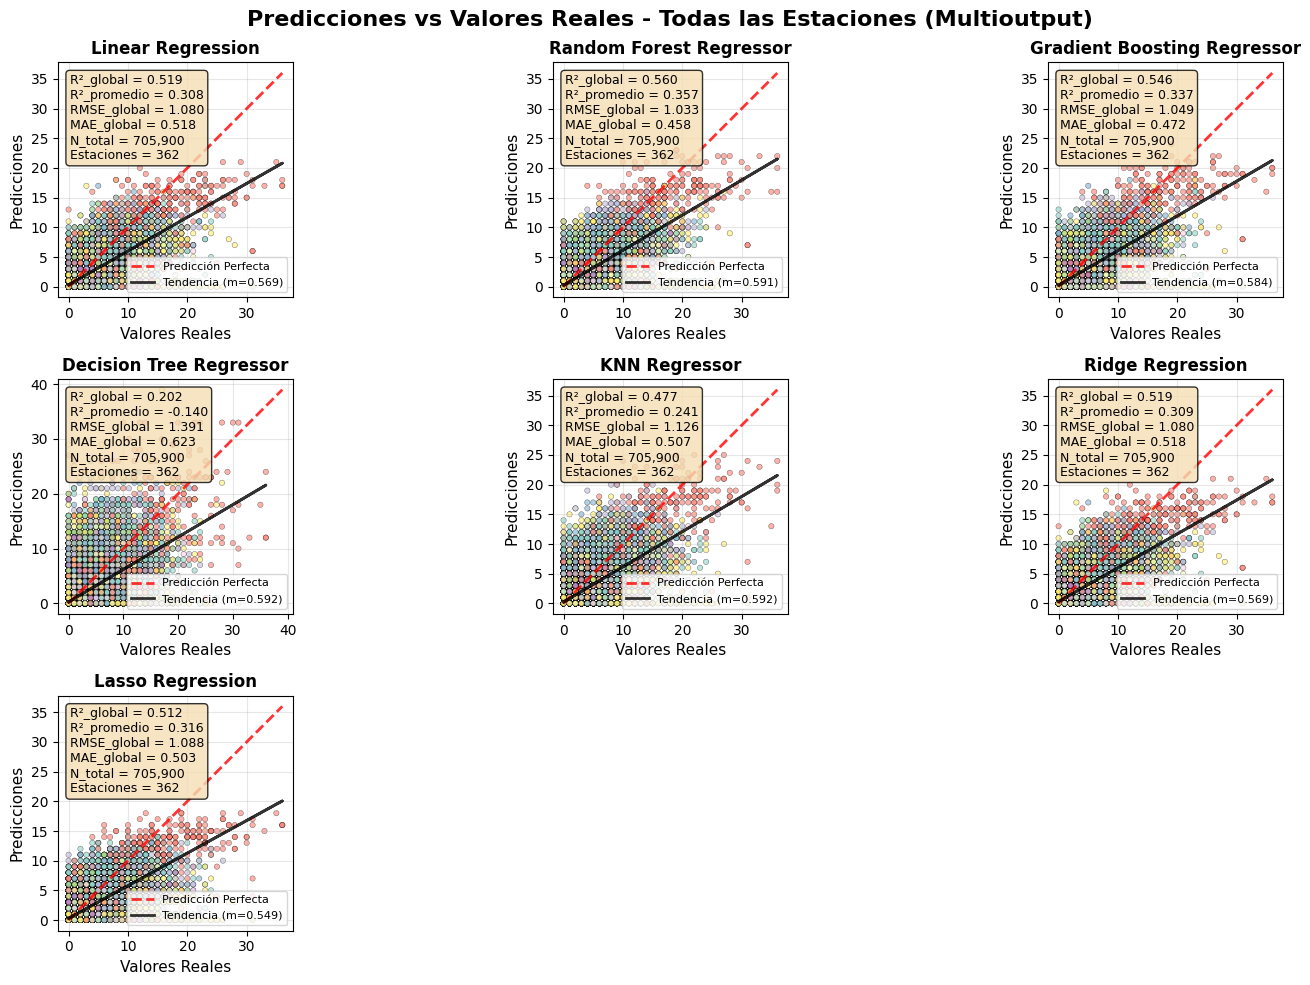


📊 Resumen de gráficos consolidados:
   • 7 modelos graficados
   • 362 estaciones/targets por modelo
   • Todas las predicciones en un gráfico por modelo

🏆 Ranking general de modelos (por R²_global):
   1. Random Forest Regressor: R²_global = 0.5600, R²_promedio = 0.3566
   2. Gradient Boosting Regressor: R²_global = 0.5459, R²_promedio = 0.3369
   3. Ridge Regression: R²_global = 0.5188, R²_promedio = 0.3087
   4. Linear Regression: R²_global = 0.5185, R²_promedio = 0.3085
   5. Lasso Regression: R²_global = 0.5116, R²_promedio = 0.3160
   6. KNN Regressor: R²_global = 0.4774, R²_promedio = 0.2410
   7. Decision Tree Regressor: R²_global = 0.2015, R²_promedio = -0.1399

📈 Mejores modelos por estación/target:
   • target_estacion_2: Gradient Boosting Regressor (R² = 0.4990)
   • target_estacion_3: Random Forest Regressor (R² = 0.6125)
   • target_estacion_4: Random Forest Regressor (R² = 0.7088)
   • target_estacion_5: Gradient Boosting Regressor (R² = 0.6687)
   • target_estacion_6:

In [10]:
# Comparación de modelos multioutput
importlib.reload(mt)
print(y_val_full.shape, pred_multi.shape)
predicciones_multi_full = {
    'Linear Regression': (y_val_full, pred_multi, target_names_train),
    'Random Forest Regressor': (y_val_full, pred_multi_rf, target_names_train),
    'Gradient Boosting Regressor': (y_val_full, pred_multi_gb, target_names_train),
    'Decision Tree Regressor': (y_val_full, pred_multi_dt, target_names_train),
    'KNN Regressor': (y_val_full, pred_multi_knn, target_names_train),
    # 'SVR Regressor': (y_val_full, pred_multi_svr, target_names_train),
    'Ridge Regression': (y_val_full, pred_multi_lr_ridge, target_names_train),
    'Lasso Regression': (y_val_full, pred_multi_lr_lasso, target_names_train)
}

a = mt.comparar_metricas_modelos_multioutput(predicciones_multi_full)
mt.graficar_comparativa_modelos_multioutput(predicciones_multi_full)

## 5. Red Neuronal
- Probamos redes neuronales a ver si mejoran los resultados
- Usamos los pismos datasets creados para el modelos anterior

In [11]:
importlib.reload(dp)
df_train_multi_complete = dp.filtrar_dataset_por_estaciones(train_f2, feature_stations, verbose=True)
X_train_full, y_train_full, feature_names_train_full, target_names_train = dp.dividir_dataset_multiples_estaciones(df_train_multi_complete, stations)

print("size x: ", X_train_full.shape)
df_val_multi_complete = dp.filtrar_dataset_por_estaciones(val_f2, feature_stations, verbose=False)
X_val_full, y_val_full, feature_names_val_full, target_names_val = dp.dividir_dataset_multiples_estaciones(df_val_multi_complete, stations)

=== FILTRADO POR ESTACIONES ===
Estaciones a incluir: [5, 202, 8, 14, 128, 130, 175]
Shape original: (12108, 5082)
Bicis salieron - Incluir: 7 columnas
Bicis salieron - Excluir: 355 columnas
Llegadas lag - Incluir: 84 columnas
Llegadas lag - Excluir: 4260 columnas
✓ Agregada columna 'llegadas_total_h1' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h10' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h12' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h16' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h2' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h20' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h24' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h3' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h4' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h5' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h6' (suma de 355 estaciones)
✓ Agregada columna 'llegad


 Configuración completa con todas las mejoras:
🔧 Usando device: cpu
🏗️  Arquitectura: 116 -> 256 -> 128 -> 64 -> 32 -> 362
⚙️  Mejoras: Adam=True, Dropout=0.3, L2=0.0001, Norm=True, EarlySt=True, Sched=True, Plot=True
🚀 Iniciando entrenamiento...
Época 10/100 - Train Loss: 0.701319 - Val Loss: 0.734819 - LR: 5.00e-04 - Best Val: 0.734819
Época 20/100 - Train Loss: 0.686862 - Val Loss: 0.722073 - LR: 5.00e-04 - Best Val: 0.722073
Época 30/100 - Train Loss: 0.685402 - Val Loss: 0.718683 - LR: 5.00e-04 - Best Val: 0.718332
Época 40/100 - Train Loss: 0.680634 - Val Loss: 0.722167 - LR: 2.50e-04 - Best Val: 0.717276
Época 50/100 - Train Loss: 0.677864 - Val Loss: 0.718904 - LR: 2.50e-04 - Best Val: 0.715712
Época 60/100 - Train Loss: 0.675097 - Val Loss: 0.715463 - LR: 1.25e-04 - Best Val: 0.715295
Época 70/100 - Train Loss: 0.674389 - Val Loss: 0.715510 - LR: 6.25e-05 - Best Val: 0.714507
⏹️  Early stopping en época 78


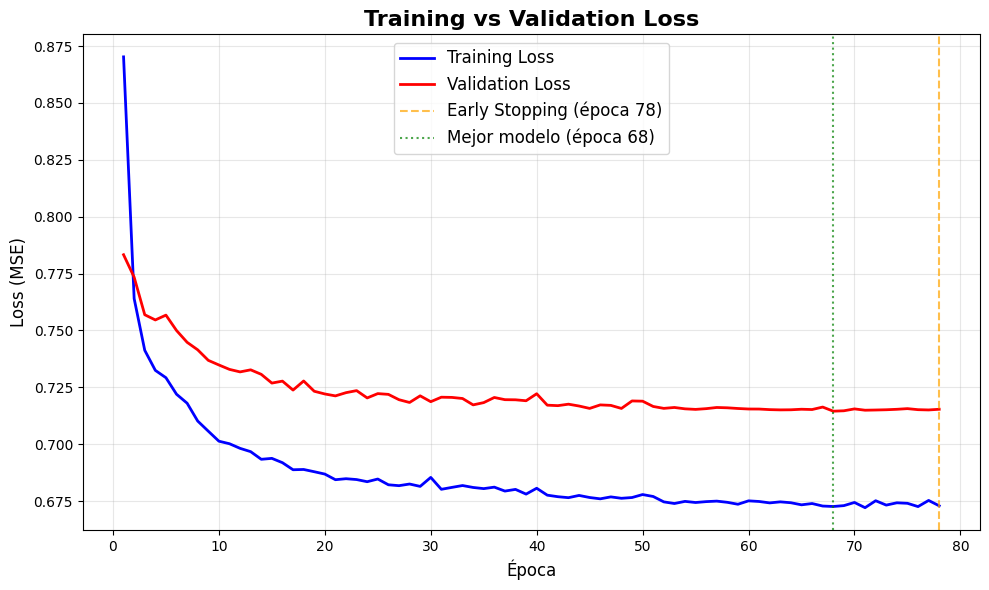

📊 Gráfico de pérdidas generado
📈 Training loss final: 0.672903
📉 Validation loss final: 0.715346
🏆 Mejor validation loss: 0.714507 en época 68
✅ Entrenamiento completado!
📊 Train Loss final: 0.672903
📊 Val Loss final: 0.715346
🏆 Mejor val loss: 0.714507
🎯 Predicciones generadas: (1950, 362)
📈 Rango predicciones: [0.00, 24.00]


In [16]:
importlib.reload(md2)
print("\n Configuración completa con todas las mejoras:")
mejoras = {
    'hidden_sizes': [256, 128, 64, 32],
    'learning_rate': 0.0005,
    'epochs': 100,  # Reducido para demo
    'batch_size': 64,
    'dropout_rate': 0.3,
    'early_stopping_patience': 10,
    'normalize': True,
    'verbose': True,
    'use_adam': True,
    'l2_regularization': 1e-4,
    'use_scheduler': True
}

y_pred_nn1, train_losses_nn1, val_losses_nn1 = md2.neural_network_multioutput(
    X_train_full, y_train_full, X_val_full, y_val_full,
    hidden_sizes=[256, 128, 64, 32],
    learning_rate=0.0005,
    epochs=100,  # Reducido para demo
    batch_size=64,
    dropout_rate=0.3,
    early_stopping_patience=10,
    normalize=True,
    verbose=True,
    use_adam=True,
    l2_regularization=1e-4,
    use_scheduler=True
)

# # Preparar datos para la comparación de múltiples arquitecturas
# predictions = {}
# model_names = list(results.keys())

# for i in range(len(model_names)):
#     # Convert list architecture to tuple to make it hashable
#     arch_tuple = tuple(results[model_names[i]]['architecture'])
#     predictions[arch_tuple] = (y_val_full, results[model_names[i]]['predictions'], target_names_train)

# importlib.reload(mt)
# mt.plot_multioutput_predictions(predictions)


In [ ]:
importlib.reload(mt)
a = mt.calcular_metricas_multioutput(
    y_val_full, 
    y_pred_nn1, 
    target_names_train, 
)


📊 MÉTRICAS MULTIOUTPUT - RESUMEN COMPLETO

🎯 CONFIGURACIÓN:
   • Targets: 362
   • Muestras por target: 1,950
   • Muestras totales: 705,900

🏆 MÉTRICAS GLOBALES (todos los datos combinados):
   • R²_global: 0.5542
   • RMSE_global: 1.0396
   • MAE_global: 0.4672
   • MAPE_global: 66512788206864472.00%
   • Correlación_global: 0.7453

📊 MÉTRICAS AGREGADAS (promedio entre targets):
   • R²_promedio: 0.3701
   • RMSE_promedio: 0.9663
   • MAE_promedio: 0.4672
   • MAPE_promedio: 66512788206864472.00%
   • Correlación_promedio: 0.6108

📈 DESEMPEÑO POR TARGET:
   • target_estacion_2: R² = 0.4680, RMSE = 1.4042
   • target_estacion_3: R² = 0.6250, RMSE = 1.4454
   • target_estacion_4: R² = 0.6850, RMSE = 1.6981
   • target_estacion_5: R² = 0.6613, RMSE = 2.0118
   • target_estacion_6: R² = 0.5684, RMSE = 1.4356
   • target_estacion_7: R² = 0.3022, RMSE = 0.8939
   • target_estacion_8: R² = 0.6758, RMSE = 1.7843
   • target_estacion_9: R² = 0.6561, RMSE = 1.6779
   • target_estacion_12: R² 

{'por_target': {'target_estacion_2': {'MAE': 0.6394871794871795,
   'MSE': 1.971794871794872,
   'RMSE': 1.4042061357916336,
   'R²': 0.46799675224531945,
   'MAPE': 9.145771550967776e+16,
   'Explained_Variance': 0.47734642860867993,
   'Max_Error': 11.0,
   'Correlation': 0.7116240381936918,
   'Bias': 0.18615384615384614,
   'Relative_Error_%': 2030769250.8051672,
   'Mean_True': 0.8005128205128205,
   'Mean_Pred': 0.9866666666666667,
   'Std_True': 1.9251905649504146,
   'Std_Pred': 1.69821223241525,
   'N_Samples': 1950},
  'target_estacion_3': {'MAE': 0.7374358974358974,
   'MSE': 2.0892307692307694,
   'RMSE': 1.445417160971451,
   'R²': 0.6249997167778534,
   'MAPE': 7.090282490270474e+16,
   'Explained_Variance': 0.6264288557296596,
   'Max_Error': 12.0,
   'Correlation': 0.7940040718108518,
   'Bias': -0.08923076923076922,
   'Relative_Error_%': 1574358993.9546697,
   'Mean_True': 1.3312820512820513,
   'Mean_Pred': 1.2420512820512821,
   'Std_True': 2.360355448555153,
   'St

### Entrenamos muchos modelos con redes neuronales

🔄 Entrenando múltiples arquitecturas...
\Entrenando Arch 64-32...
\Entrenando Arch 128-64-32...
\Entrenando Arch 256-128-64...
\Entrenando Arch 512-256-128...
\Entrenando Arch 1024-512-256-128...
\Entrenando Arch 500-500-500-500-500...

✅ Entrenamiento completado!

📊 Generando gráfico de comparación...


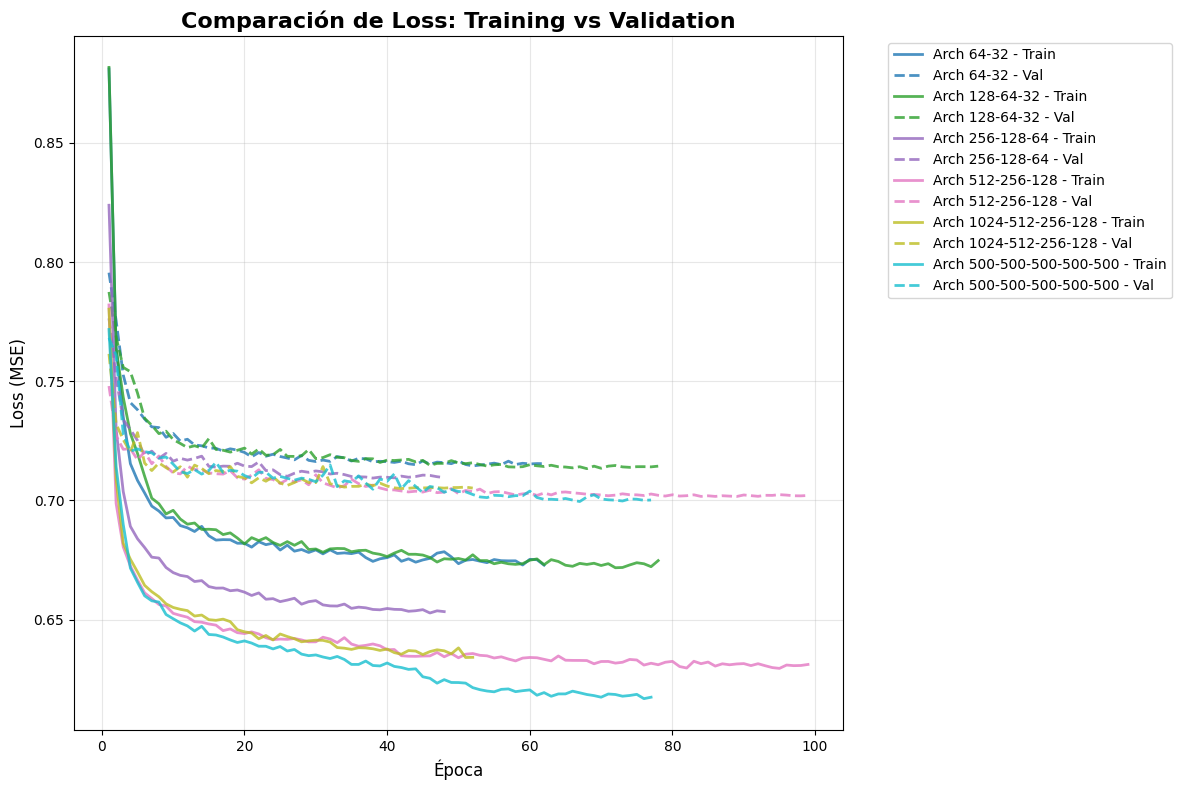


📊 Estadísticas Finales:
------------------------------------------------------------
Arch 64-32:
  📈 Train Loss final: 0.672806
  📉 Val Loss final: 0.715403
  🏆 Mejor Val Loss: 0.714461 (época 52)
  📏 Épocas entrenadas: 62

Arch 128-64-32:
  📈 Train Loss final: 0.674713
  📉 Val Loss final: 0.714353
  🏆 Mejor Val Loss: 0.713303 (época 68)
  📏 Épocas entrenadas: 78

Arch 256-128-64:
  📈 Train Loss final: 0.653303
  📉 Val Loss final: 0.709551
  🏆 Mejor Val Loss: 0.709346 (época 38)
  📏 Épocas entrenadas: 48

Arch 512-256-128:
  📈 Train Loss final: 0.631135
  📉 Val Loss final: 0.702049
  🏆 Mejor Val Loss: 0.701616 (época 89)
  📏 Épocas entrenadas: 99

Arch 1024-512-256-128:
  📈 Train Loss final: 0.634131
  📉 Val Loss final: 0.705156
  🏆 Mejor Val Loss: 0.704970 (época 42)
  📏 Épocas entrenadas: 52

Arch 500-500-500-500-500:
  📈 Train Loss final: 0.617389
  📉 Val Loss final: 0.700140
  🏆 Mejor Val Loss: 0.699499 (época 67)
  📏 Épocas entrenadas: 77



In [18]:
importlib.reload(md2)
architectures = [
    [64, 32],
    [128, 64, 32], 
    [256, 128, 64],
    [512, 256, 128],
    [1024, 512, 256, 128],
    [500,500,500,500,500],
]

results = md2.compare_model_architectures(
    X_train_full, y_train_full, X_val_full, y_val_full,
    architectures,
    learning_rate=0.0005,
    epochs=100,  # Reducido para demo
    batch_size=64,
    dropout_rate=0.3,
    early_stopping_patience=10,
    normalize=True,
    verbose=True,
    use_adam=True,
    l2_regularization=1e-4,
    use_scheduler=True
)

# results = {'model_1': {'architecture': hidden_sizes,
        #     'predictions': y_pred,
        #     'losses': (train_losses, val_losses),
        #     'final_train_loss': train_losses[-1],
        #     'final_val_loss': val_losses[-1],
        #     'best_val_loss': min(val_losses),
        #     'best_epoch': val_losses.index(min(val_losses)) + 1,
        #     'total_epochs': len(train_losses)
        # }}

Obtenemos los valores para las métricas comparando las redes neuronales.


📊 COMPARATIVA DE MÉTRICAS MULTIOUTPUT ENTRE MODELOS
 Rank                    Modelo  MAE_promedio  MSE_promedio  RMSE_promedio  R²_promedio  MAPE_promedio  Explained_Variance_promedio  Max_Error_maximo  Max_Error_promedio  Correlación_promedio  Bias_promedio  Relative_Error_%_promedio
    1 (500, 500, 500, 500, 500)        0.4528         1.039         0.9492       0.3871      6.098e+16                       0.3913                30               8.359                0.6199       -0.02867                  1.354e+09
    2           (512, 256, 128)        0.4564         1.041         0.9504       0.3854      6.337e+16                       0.3897                31               8.378                 0.618       -0.02339                  1.407e+09
    3     (1024, 512, 256, 128)        0.4581         1.049         0.9538       0.3828      6.366e+16                       0.3877                31               8.395                 0.617       -0.02721                  1.413e+09
    4      

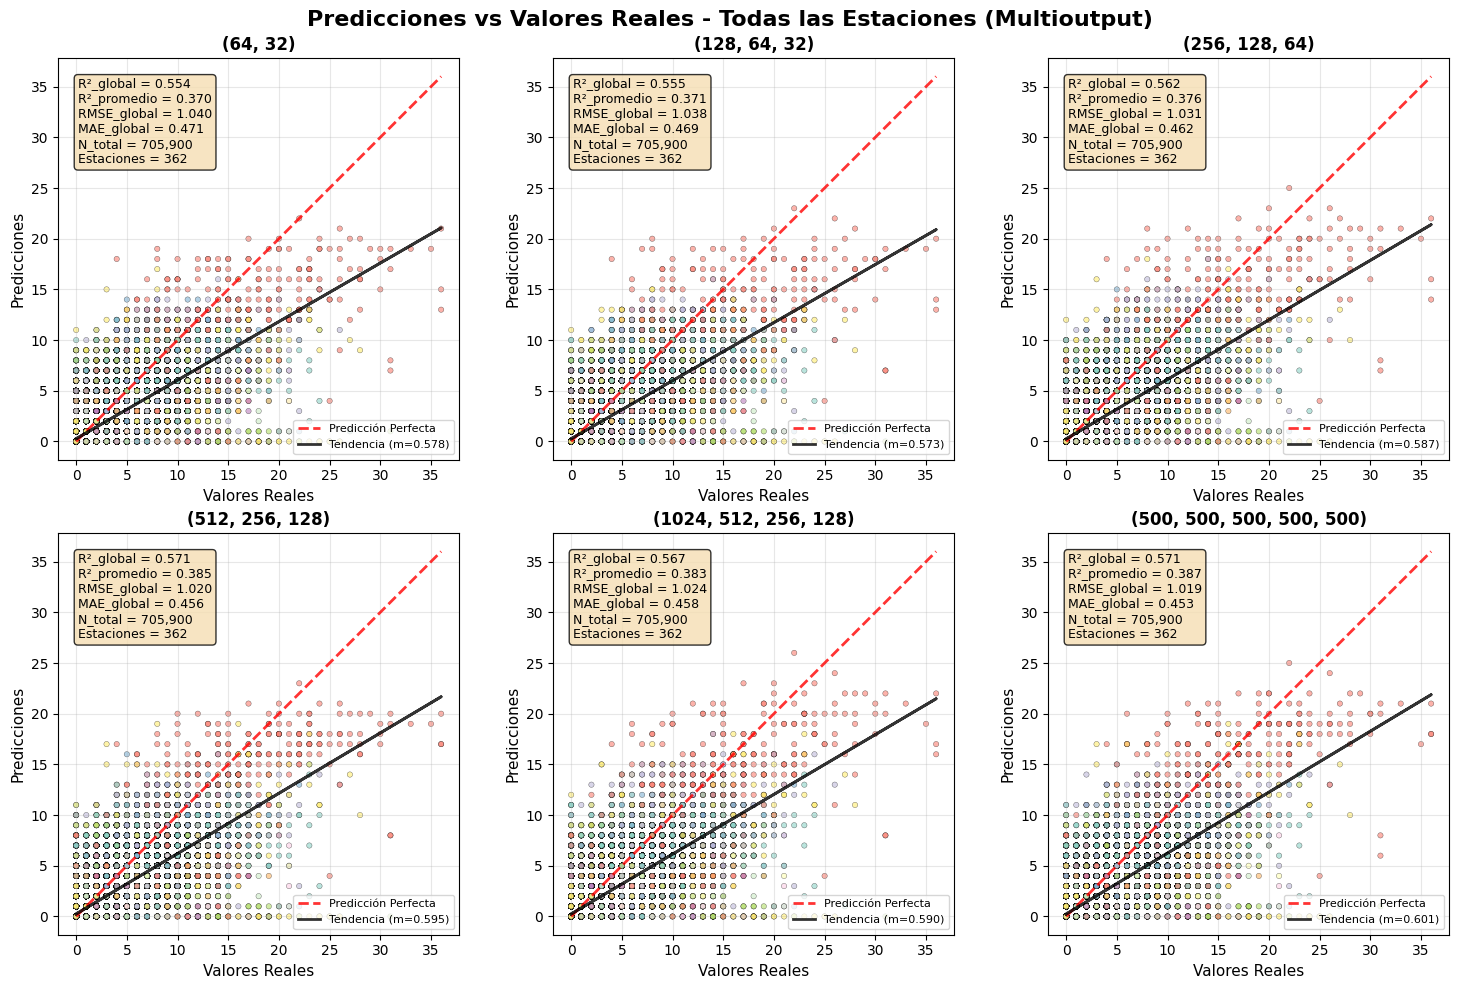


📊 Resumen de gráficos consolidados:
   • 6 modelos graficados
   • 362 estaciones/targets por modelo
   • Todas las predicciones en un gráfico por modelo

🏆 Ranking general de modelos (por R²_global):
   1. (500, 500, 500, 500, 500): R²_global = 0.5714, R²_promedio = 0.3871
   2. (512, 256, 128): R²_global = 0.5707, R²_promedio = 0.3854
   3. (1024, 512, 256, 128): R²_global = 0.5672, R²_promedio = 0.3828
   4. (256, 128, 64): R²_global = 0.5620, R²_promedio = 0.3758
   5. (128, 64, 32): R²_global = 0.5552, R²_promedio = 0.3712
   6. (64, 32): R²_global = 0.5539, R²_promedio = 0.3697

📈 Mejores modelos por estación/target:
   • target_estacion_2: (256, 128, 64) (R² = 0.4896)
   • target_estacion_3: (256, 128, 64) (R² = 0.6323)
   • target_estacion_4: (500, 500, 500, 500, 500) (R² = 0.7373)
   • target_estacion_5: (512, 256, 128) (R² = 0.6848)
   • target_estacion_6: (500, 500, 500, 500, 500) (R² = 0.5863)
   • target_estacion_7: (500, 500, 500, 500, 500) (R² = 0.3287)
   • target_esta

In [19]:
predictions = {}
model_names = list(results.keys())

for i in range(len(model_names)):
    # Convert list to tuple to make it hashable for dictionary key
    arch_tuple = tuple(results[model_names[i]]['architecture'])
    predictions[arch_tuple] = (y_val_full, results[model_names[i]]['predictions'], target_names_train)

importlib.reload(mt)
a = mt.comparar_metricas_modelos_multioutput(predictions)
mt.graficar_comparativa_modelos_multioutput(predictions)

Vemos que le fue mejor a la que tiene muchas capas asi qu eprobamos más redes neuronales con muchas capas viendo lo de "just add more layers".

🔄 Entrenando múltiples arquitecturas...
\Entrenando Arch 500-500-500-500-500...
\Entrenando Arch 500-500-500-500-500-500...
\Entrenando Arch 4096-2048-1024-512-256-128-64...
\Entrenando Arch 1000-500-250-125-64-32-16...
\Entrenando Arch 100-100-100-100-100-100-100-100-100-100...

✅ Entrenamiento completado!

📊 Generando gráfico de comparación...


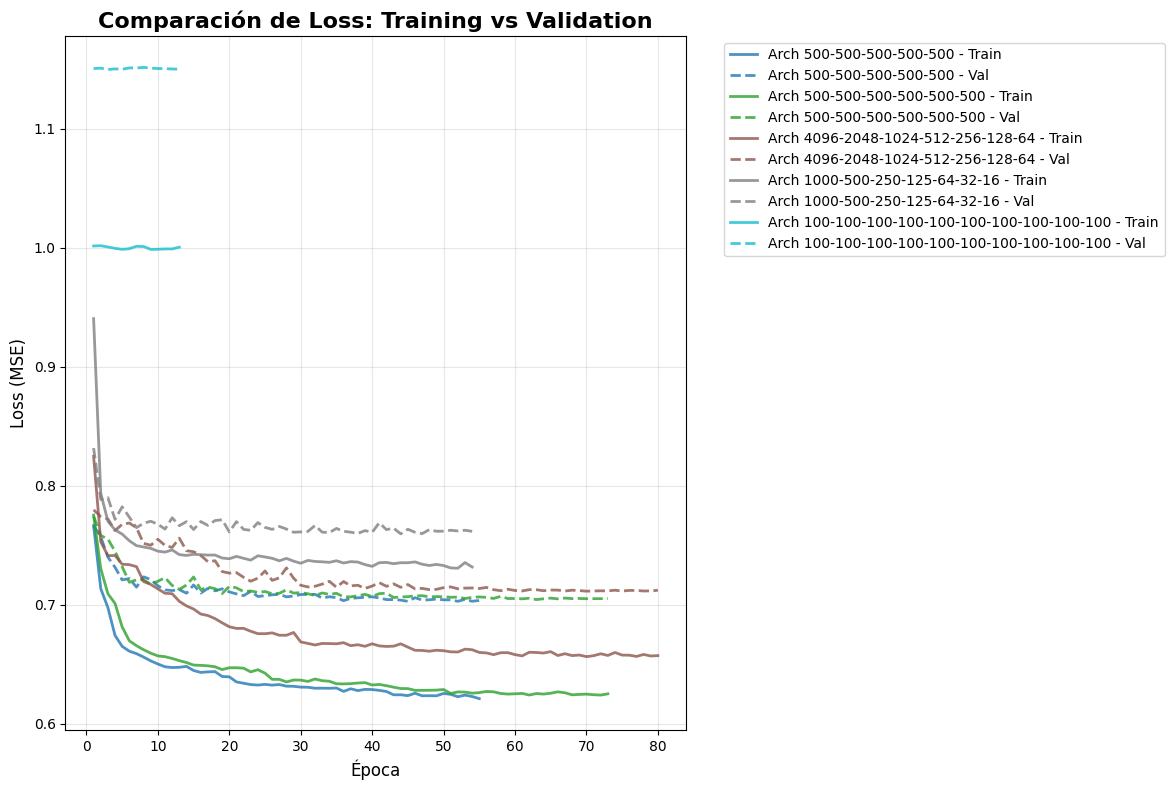


📊 Estadísticas Finales:
------------------------------------------------------------
Arch 500-500-500-500-500:
  📈 Train Loss final: 0.621180
  📉 Val Loss final: 0.703665
  🏆 Mejor Val Loss: 0.702927 (época 45)
  📏 Épocas entrenadas: 55

Arch 500-500-500-500-500-500:
  📈 Train Loss final: 0.625227
  📉 Val Loss final: 0.705394
  🏆 Mejor Val Loss: 0.704437 (época 63)
  📏 Épocas entrenadas: 73

Arch 4096-2048-1024-512-256-128-64:
  📈 Train Loss final: 0.657342
  📉 Val Loss final: 0.712229
  🏆 Mejor Val Loss: 0.711491 (época 70)
  📏 Épocas entrenadas: 80

Arch 1000-500-250-125-64-32-16:
  📈 Train Loss final: 0.731818
  📉 Val Loss final: 0.761762
  🏆 Mejor Val Loss: 0.759644 (época 44)
  📏 Épocas entrenadas: 54

Arch 100-100-100-100-100-100-100-100-100-100:
  📈 Train Loss final: 1.000516
  📉 Val Loss final: 1.150047
  🏆 Mejor Val Loss: 1.149782 (época 3)
  📏 Épocas entrenadas: 13



In [20]:
importlib.reload(md2)
architectures = [
    [500,500,500,500,500],
    [500,500,500,500,500,500],
    [4096, 2048, 1024, 512, 256, 128, 64],
    [1000, 500, 250, 125, 64, 32, 16],
    [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
]

results = md2.compare_model_architectures(
    X_train_full, y_train_full, X_val_full, y_val_full,
    architectures,
    learning_rate=0.0005,
    epochs=100,  # Reducido para demo
    batch_size=64,
    dropout_rate=0.3,
    early_stopping_patience=10,
    normalize=True,
    verbose=True,
    use_adam=True,
    l2_regularization=1e-4,
    use_scheduler=True
)


📊 COMPARATIVA DE MÉTRICAS MULTIOUTPUT ENTRE MODELOS
 Rank                                             Modelo  MAE_promedio  MSE_promedio  RMSE_promedio  R²_promedio  MAPE_promedio  Explained_Variance_promedio  Max_Error_maximo  Max_Error_promedio  Correlación_promedio  Bias_promedio  Relative_Error_%_promedio
    1                          (500, 500, 500, 500, 500)        0.4538         1.044         0.9514       0.3856      6.162e+16                       0.3905                31               8.425                0.6174       -0.03902                  1.368e+09
    2                     (500, 500, 500, 500, 500, 500)        0.4581         1.049         0.9544       0.3811      6.337e+16                       0.3858                31               8.298                0.6172       -0.01688                  1.407e+09
    3              (4096, 2048, 1024, 512, 256, 128, 64)         0.466         1.072         0.9624       0.3729       6.66e+16                       0.3781              

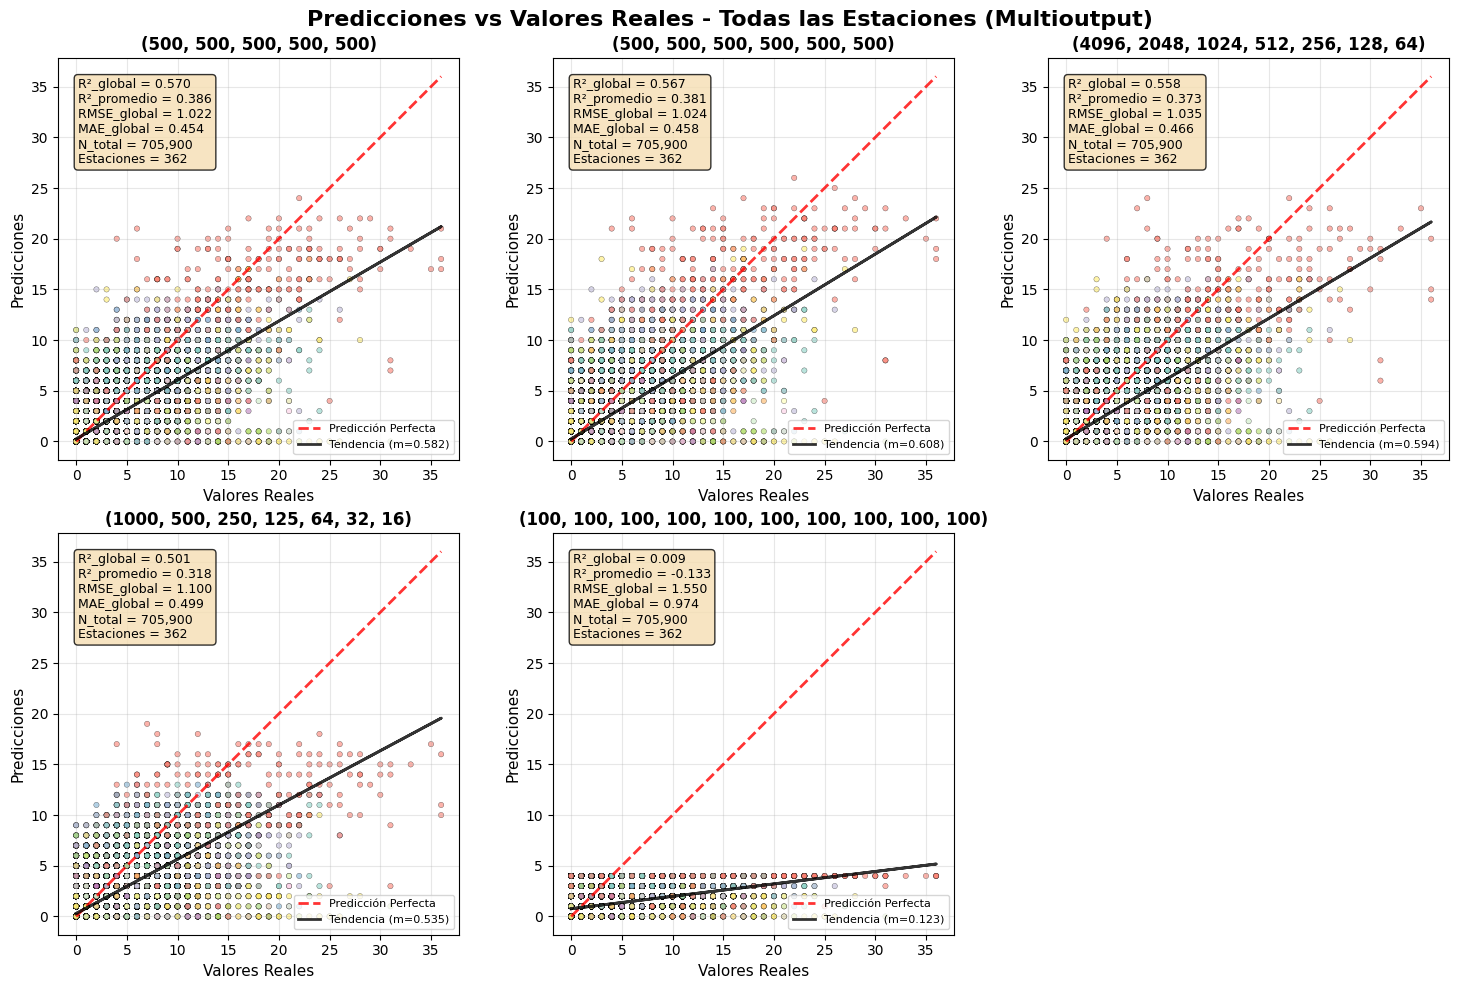


📊 Resumen de gráficos consolidados:
   • 5 modelos graficados
   • 362 estaciones/targets por modelo
   • Todas las predicciones en un gráfico por modelo

🏆 Ranking general de modelos (por R²_global):
   1. (500, 500, 500, 500, 500): R²_global = 0.5695, R²_promedio = 0.3856
   2. (500, 500, 500, 500, 500, 500): R²_global = 0.5672, R²_promedio = 0.3811
   3. (4096, 2048, 1024, 512, 256, 128, 64): R²_global = 0.5579, R²_promedio = 0.3729
   4. (1000, 500, 250, 125, 64, 32, 16): R²_global = 0.5006, R²_promedio = 0.3180
   5. (100, 100, 100, 100, 100, 100, 100, 100, 100, 100): R²_global = 0.0085, R²_promedio = -0.1333

📈 Mejores modelos por estación/target:
   • target_estacion_2: (500, 500, 500, 500, 500) (R² = 0.4751)
   • target_estacion_3: (4096, 2048, 1024, 512, 256, 128, 64) (R² = 0.6362)
   • target_estacion_4: (500, 500, 500, 500, 500, 500) (R² = 0.7328)
   • target_estacion_5: (500, 500, 500, 500, 500, 500) (R² = 0.6788)
   • target_estacion_6: (4096, 2048, 1024, 512, 256, 128, 6

In [22]:
predictions = {}
model_names = list(results.keys())

for i in range(len(model_names)):
    # Convert list to tuple to make it hashable for dictionary key
    arch_tuple = tuple(results[model_names[i]]['architecture'])
    predictions[arch_tuple] = (y_val_full, results[model_names[i]]['predictions'], target_names_train)

importlib.reload(mt)
a = mt.comparar_metricas_modelos_multioutput(predictions)
mt.graficar_comparativa_modelos_multioutput(predictions)

# Visualización de las features 2
Hacemos PCA y visualizamos, imprimimos estadísticas descriptivas y graficamos las distribuciones de las features. Cualquier cosa que ayude.

In [10]:
importlib.reload(vis2)
pca_model, scaler_model = vis2.graficar_pca(X_train_202, y_train_202)

NameError: name 'X_train_202' is not defined

# Feature engineering
Acomodamos features, relacionamos, sacamos, reducimos la dimensionalidad, etc. para mejorar el modelo en base a lo que vimos en la visualización.

# Cross validation
Elegimos los óptimos hiperparámetros.

In [23]:
importlib.reload(dp)
df_train_multi_complete = dp.filtrar_dataset_por_estaciones(train_f2, feature_stations, verbose=True)
X_train_full, y_train_full, feature_names_train_full, target_names_train = dp.dividir_dataset_multiples_estaciones(df_train_multi_complete, stations)

print("size x: ", X_train_full.shape)
df_val_multi_complete = dp.filtrar_dataset_por_estaciones(val_f2, feature_stations, verbose=False)
X_val_full, y_val_full, feature_names_val_full, target_names_val = dp.dividir_dataset_multiples_estaciones(df_val_multi_complete, stations)

=== FILTRADO POR ESTACIONES ===
Estaciones a incluir: [5, 202, 8, 14, 128, 130, 175]
Shape original: (12108, 5082)
Bicis salieron - Incluir: 7 columnas
Bicis salieron - Excluir: 355 columnas
Llegadas lag - Incluir: 84 columnas
Llegadas lag - Excluir: 4260 columnas
✓ Agregada columna 'llegadas_total_h1' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h10' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h12' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h16' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h2' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h20' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h24' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h3' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h4' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h5' (suma de 355 estaciones)
✓ Agregada columna 'llegadas_total_h6' (suma de 355 estaciones)
✓ Agregada columna 'llegad

In [25]:
importlib.reload(cv)
dict_best_comb = cv.cross_validation_neural_network_multioutput(X_train_full, y_train_full, [500, 500, 500, 500, 500],
                                               learning_rate_list=[0.001, 0.01, 0.1],
                                               epochs_list=[50, 100, 200],
                                               batch_size_list=[16, 32, 64],
                                               dropout_rate_list=[None, 0.2, 0.5],
                                               l2_reg_list=[None, 0.001, 0.01],
                                               use_adam_list=[True, False],
                                               use_scheduler_list=[True, False],
                                               cv_folds=5, random_state=42,
                                               early_stopping_patience=10,
                                               target_names=target_names_train)

🧠 Cross-Validation Red Neuronal Avanzado - Capas: [500, 500, 500, 500, 500]
   Datos: 12108 filas, 116 features, 362 targets
   Combinaciones: 972
   Opciones Adam: [True, False], Scheduler: [True, False], Early Stopping: 10
🔄 1/972: lr=0.001, epochs=50, batch=16, dropout=None, l2=None, adam=True, scheduler=True
   MAE: 0.5941 ± 0.0068
🔄 2/972: lr=0.001, epochs=50, batch=16, dropout=None, l2=None, adam=True, scheduler=False
   MAE: 0.5943 ± 0.0062
🔄 3/972: lr=0.001, epochs=50, batch=16, dropout=None, l2=None, adam=False, scheduler=True
   MAE: 0.9440 ± 0.0024
🔄 4/972: lr=0.001, epochs=50, batch=16, dropout=None, l2=None, adam=False, scheduler=False
   MAE: 0.9442 ± 0.0026
🔄 5/972: lr=0.001, epochs=50, batch=16, dropout=None, l2=0.001, adam=True, scheduler=True
   MAE: 0.6165 ± 0.0088
🔄 6/972: lr=0.001, epochs=50, batch=16, dropout=None, l2=0.001, adam=True, scheduler=False
   MAE: 0.6223 ± 0.0086
🔄 7/972: lr=0.001, epochs=50, batch=16, dropout=None, l2=0.001, adam=False, scheduler=True

KeyboardInterrupt: 

# Entrenamientos finales
Entrenamos los modelos finales con los hiperparámetros óptimos y guardamos los resultados.